## Nupack Analysis Code 

nupack-4.0.0.26

Nupack download: http://www.nupack.org/downloads

Nupack documentation: https://piercelab-caltech.github.io/nupack-docs/analysis/

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from itertools import cycle
from datetime import datetime
from nupack import *

Note: As of 14-Feb-2022, the NUPACK web app and the NUPACK python library run on different backend models. 
The python model (herein) is the newest version.

If you want the results of this code to match the web app, use the model-material designator 'rna95-nupack3'. 
See below

model1 = Model(material='rna95-nupack3', ensemble='some-nupack3', celsius=37)
A = Strand('CTGATCGAT', name='Strand A')
B = Strand('GATCGTAGTC', name='Strand B')

# specify tube
t1 = Tube(strands={A: 1e-8, B: 1e-9},
    complexes=SetSpec(max_size=2), name='Tube 1') # all complexes of up to 2 strands

# run tube analysis job
my_results = tube_analysis(tubes=[t1], model=model1)
my_results

## Supporting functions 

In [119]:
def make_list(concentration_A):
    """This puts concentration_A in a list.
       Input: Numerical input. Can be list of/or int/float
       Output: list of concentration_A
    """
    if not isinstance(concentration_A, list):
        concentration_A = [concentration_A]
    elif isinstance(concentration_A, list):
        pass
    return concentration_A
    
    
def is_string(nucleic_acid_type):
    """This puts nucleic_acid_type and checks it as a string.
       Input: String input. Can be 'rna' or 'dna'
       Output: output is input string
    """
    if not isinstance(nucleic_acid_type, str):
        
        try:
            nucleic_acid_type = str(nucleic_acid_type.lower())
        except:
            print("Check nucleic_acid is a string")
            pass
    else:
        pass
    
    return nucleic_acid_type


def print_strands(A,B):
    print("5'-"+str(A)+"-3'")
    print("3'-"+str(B)+"-5'")

    
# def is_nucleic_acid(nucleic_acid_type):
#     """This puts nucleic_acid_type and checks it as a  A,T,G,C,U .
#        Input: String input. Can be 'rna' or 'dna'
#        Output: 
#     """
#     nucleic_acid_type
        #are any of these string characters not is my list of nucleobases
    
    
#     concentration_A = is_list(concentration_A)


def report_parameters(Results):
    print(str(len(Results.keys())) + ' number of conditions')
    index = list(Results.keys())
    return index


def report_summary(Results, indexbyNumber):
    index = report_parameters(Results)
    print(index[indexbyNumber])
    return Results[index[indexbyNumber]]


def convertK_to_C(tempK):
    """ Converts temp in kelvin to temp in Celsius
    """
    tempC = tempK-273.14
    return round(tempC)


def print_tempC(temperature_C):
    """Reports number of temperatures being evaluated
        Input: temperature_C
    """
    print("Number of temps: "+str(len(temperature_C)))


def print_tubes(tubes):
    """Reports number of tube conditions being evaluated
        Input: tubes
    """
    tubes_ = make_list(tubes)
    print("Number of tubes: "+str(len(tubes_[0])))   ##### debugging
    
    
def convert_copyNumber2Conc(sampleSize_uL=25, target_number=1000):
    """Gets molar concentration of target in solution
        Input: sampleSize in μL, estimated target molecule amount
        Output: target_concentration molarity (M)
    """
    NA = 6.022e23 # Avogadros number (mol^-1)
#     '{:.2g}'.format(sampleSize)
    sampleSize_L = sampleSize_uL*1e-6 # Convert sample size to L
    target_conc = (target_number/(sampleSize_L))*(1/NA) # convert concentration to molarity
    return float('{:.3g}'.format(target_conc))


def convert_conc2copyNumber(Concentration_M, sampleSize_uL=25):
    """Finds copy number from molarity of target in solution
        Input: sampleSize in μL, estimated target molecule amount
        Output: copy number
    """
    NA = 6.022e23 # Avogadros number (mol^-1)
    sampleSize_L = float(sampleSize_uL)*1e-06 # Convert sample size to L
    copyNumber = float(Concentration_M)*sampleSize_L*NA
    return round(float('{:.1g}'.format(copyNumber)),2)
     
    
def save_fig(fig, name='NUPACK_Results'):
    """ Saviing the figure
        Input: fig object and figure name
        Output: Saved png figure
    """
    date = datetime.now()
    date_str = str(date)[0:-7]
    fig.savefig(name+date_str+'.png',dpi=100,bbox_inches='tight')
    return print("Figure saved")
# save_fig(fig, name)

## Main Functions.


In [90]:
#del A
#del B
strands_input = strands
strand_dict = {}
concentration=[1e-09, 3e-09]
for i in range(0,len(list(strands_input))):
    # Build a dictionary of all the input strands
    #strand_dict[strand_names[i]] = strands_input[i] #####################################################


    strand_dict[Strand(strands_input[i], name='Strand '+strand_names[i])] = concentration[i]
    
    #strand_list = locals()[strand_names[i]] = Strand(strands_input[i], name='Strand '+strand_names[i])
    
strand_dict


{<Strand Strand A>: 1e-09, <Strand Strand B>: 3e-09}

In [102]:
concentrations=[[1e-09], [3e-09]]
for i in range(0,len(concentrations)):
    print(i)
    print(concentrations[i])

0
[1e-09]
1
[3e-09]


In [116]:
strand_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
                'AA','AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM','AN','AO','AP','AQ','AR','AS','AT','AU','AV','AW','AX','AY','AZ',
                'BA','BB','BC','BD','BE','BF','BG','BH','BI','BJ','BK','BL','BM','BN','BO','BP','BQ','BR','BS','BT','BU','BV','BW','BX','BY','BZ',
                'CA','CB','CC','CD','CE','CF','CG','CH','CI','CJ','CK','CL','CM','CN','CO','CP','CQ','CR','CS','CT','CU','CV','CW','CX','CY','CZ']

##### I need to replace this older hard-code naming system with a dictionary 
dict_of_strands = {}
list_of_strands = []
for i in range(0,len(concentrations)):
    dict_of_strands[strand_names[i]] = concentrations[i]
    

    
#     locals()[strand_names[i]] = concentrations[i]
# print(str(strand_names[0]) + "-" +  str(strand_names[i]))
dict_of_strands['A']


[1e-09]

In [173]:
def models_maker(nucleic_acid_type='dna', temperature_C=37, Na_M=0.05, Mg_M=0):
    """Input: material: (DNA as 'dna' or RNA as 'rna'), 
              temperature (C): temperatures to evaluate as list
              sodium [Na+]: in Molarity (M), (Ex: 1e-9) aka 1nM. Minimum = 0.05
              magnesium [Mg++]: in Molarity (M), (Ex: .000001) aka μM 
              Note: This function is set up for only RNA salt concentrations.
              DNA would also need potassium and ammonium. Not sure how to get that functionality
              
       Output: Models for each temperature.
    """
    if not isinstance(Na_M,list):
        if Na_M < 0.05:
            print('Minimum [Na] >= 0.05')
            Na_M = 0.05
        else:
            pass
    else:
        pass
        
    oligonucleotide = is_string(nucleic_acid_type).lower()
    models = {} # collection of models based on temperature
    i = 0
    for temp in make_list(temperature_C):
        label = str(temp)+'C, '+'Na+: '+str(Na_M)+'M, '+' Mg++: '+str(Mg_M)+'M, '
        models[label] = Model(material=oligonucleotide, celsius=temp, sodium=Na_M, magnesium=Mg_M) # salt concentrations in M
        i+=1
    
    # check if list
    if not isinstance(temperature_C, list):
        temperature_C = [temperature_C]
    elif isinstance(temperature_C, list): 
        pass 
    else:
        pass
    return models


def specify_strands(fiveprime_strand):  
    """fiveprime_strand: Needs to be string of A's, T's, G's, C's:
    """
    threeprime_strand = ''
    if "U" not in fiveprime_strand and "T" in fiveprime_strand:
        for nb in fiveprime_strand:
        
            if nb.upper() == 'A':
                threeprime_strand = threeprime_strand + 'T'
            elif nb.upper() == 'T':
                threeprime_strand = threeprime_strand + 'A'
            elif nb.upper() == 'G':
                threeprime_strand = threeprime_strand + 'C'
            elif nb.upper() == 'C':
                threeprime_strand = threeprime_strand + 'G'
            else:
                pass
            
    elif "U" in fiveprime_strand and "T" not in fiveprime_strand:
        for nb in fiveprime_strand:
            if nb.upper() == 'A':
                threeprime_strand = threeprime_strand + 'U'
            elif nb.upper() == 'U':
                threeprime_strand = threeprime_strand + 'A'
            elif nb.upper() == 'G':
                threeprime_strand = threeprime_strand + 'C'
            elif nb.upper() == 'C':
                threeprime_strand = threeprime_strand + 'G'
            else:
                pass
    else:
        print('It looks like there is a mix up with RNA and DNA. Check inputs')
    
    print(fiveprime_strand)
    print(threeprime_strand)
    A = Strand(fiveprime_strand, name='Strand A')
    B = Strand(threeprime_strand, name='Strand B')
    
    # print_strands(A,B)
    return A,B

#### NEED TO IMPROVE THIS FUNCTION TO ANALYSE MORE STRANDS
def specify_tube(A, B, concentrations=[1e-09, 3e-09], setSpec=2): # name=''
# def specify_tube(strand_conc_dict, setSpec=2):
    """Inputs: A & B are <Strand Strand A>, can be list, must be same size
               concentrations as molar: e.g. input 1e-9 as 1nm
               setSpec: int(), all complexes of up to 2 strands
               name: string of tube name/number. 
       Output: tube object and complexes object
    """
    # this list is redundant with another function. Maybe make a global variable or function.
    strand_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
                    'AA','AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM','AN','AO','AP','AQ','AR','AS','AT','AU','AV','AW','AX','AY','AZ',
                    'BA','BB','BC','BD','BE','BF','BG','BH','BI','BJ','BK','BL','BM','BN','BO','BP','BQ','BR','BS','BT','BU','BV','BW','BX','BY','BZ',
                    'CA','CB','CC','CD','CE','CF','CG','CH','CI','CJ','CK','CL','CM','CN','CO','CP','CQ','CR','CS','CT','CU','CV','CW','CX','CY','CZ']
    
    ##### I need to replace this older hard-code naming system with a dictionary 
    dict_of_concentrations = {}
    for i in range(0,len(concentrations)):
        dict_of_concentrations[strand_names[i]] = make_list(concentrations[i])
    
    
    
#     list_of_concentrations = []
#     for i in range(0,len(concentrations)):
#         list_of_concentrations = list_of_strands + locals()[strand_names[i]] = concentrations[i]
        
        
#         concentration_dict[] = 
        
#         concentration_A = concentrations[i]
#         concentration_B = concentrations[i+1]

    # check if list
#     concentration_A = make_list(concentration_A)
#     concentration_B = make_list(concentration_B)

    concentration_A = dict_of_concentrations['A']
    concentration_B = dict_of_concentrations['B']
    
    
    ########################### THIS NEEDS WORK
#     function Recurse (y, number) 
#        if (number > 1)
#           Recurse ( y, number - 1 )
#        else
#           for x in range (y)
#           whatever()

    tubes = {}
    i = 0 # counter
    for concA in concentration_A:
        for concB in concentration_B:
            tube_name = 'A: '+str(concA)+'M, '+' B: '+str(concB)+'M'
            tubes[str(tube_name)] = Tube(strands={A: concA, B: concB},    ########################### THIS NEEDS WORK
            complexes=SetSpec(max_size=2), name=tube_name) # all complexes of up to 2 strands
            i+=1 
            
    # check if list
#     tubes_ = make_list(tubes)
#     print("Number of tubes: "+str(len(tubes_[0])))   ##### debugging

    print_tubes(tubes)
    return tubes


def analysis_job(tubes, models):
    """Input: tubes: <Tube Tube 1>, can be list of tubes
              models: <nupack.model.Model at XXXX>, can be dictionary
       Output: results from analysis: partition func, ΔG(kcal/mol),concnetration results 
    """
    
    # convert dict or object to list
    if isinstance(models, dict):
        models_list = list(models.values())
    elif not isinstance(models, list):
        models_list = [models]
    else:
        pass
    
    # convert dict or object to list
    if isinstance(tubes, dict):
        tubes_list = list(tubes.values())
    elif not isinstance(tubes, list): 
        tubes_list = [tubes]
    else:
        pass
    
    results = {}
    
    i = 0 # counter
    
    for model in models_list:
        label = str(list(models.keys())[i])
        
        ii = 0
        for tube in tubes_list:
            
            label_full = label + str(list(tubes.keys())[ii])

            # run tube analysis job # Debugging
            # tube = tube[list(tube.keys())[0]] # Debugging
            #model = model[list(model.keys())[0]] # Debugging
            results[label_full] = tube_analysis(tubes=[tube], model=model)
    
            ii += 1
        i += 1
    return results


def run_analysis(strands_input=['ATGC'], nucleic_acid_type='dna', temperature_C=37,
                 Na_M=1, Mg_M=0,  
                 concentrations=[1e-09, 3e-09],
                 complex_numb=2):
    
    """Wrapper function for analysis functions
    """
    # 104 strand input names. Hopefully no one will input more 104 than strands
    strand_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
                    'AA','AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM','AN','AO','AP','AQ','AR','AS','AT','AU','AV','AW','AX','AY','AZ',
                    'BA','BB','BC','BD','BE','BF','BG','BH','BI','BJ','BK','BL','BM','BN','BO','BP','BQ','BR','BS','BT','BU','BV','BW','BX','BY','BZ',
                    'CA','CB','CC','CD','CE','CF','CG','CH','CI','CJ','CK','CL','CM','CN','CO','CP','CQ','CR','CS','CT','CU','CV','CW','CX','CY','CZ']
    
    # Build models
    models = models_maker(nucleic_acid_type, temperature_C, Na_M, Mg_M) # rna or dna, temp, salt
    
    strand_dict = {}
    if len(list(strands_input)) > 1:
        # Build complement strand
        A, B = specify_strands(strands_input[0])
        strand_dict = {A: concentrations[0][0], B: concentrations[1][0]}
    
    else:
        
        
   
        for i in range(0,len(list(strands))):
            # Build a dictionary of all the input strands
            strand_dict[Strand(strands_input[i], name='Strand ' + strand_names[i])] = concentrations[i]
            
    # Build test tubes
#     tubes = Tube(strands=strand_dict,
#                complexes=SetSpec(max_size=2),
#                     name='tube')     
    
#     t2 = Tube(strands={A: 1e-10, B: 1e-9}, complexes=SetSpec(max_size=2), name='t2')
#     # Build test tubes
#     Tube(strands={A: 1e-6, B: 1e-8, C: 1e-12},
#          complexes=SetSpec(max_size=complexes))
    
    # Build test tubes
#     tubes = specify_tube(strand_dict, setSpec=complexes) #####################################################
    tubes = specify_tube(A, B, concentrations, setSpec=complexes) 
#     tube_analysis 
    return analysis_job(tubes, models)
#     return tube_analysis(tubes, models)


def make_dataFrame_from_results(Results=pd.DataFrame()): 
    """This function creates a simple dataframe from the Nupack query data. 
        This function is currently static, and should be rewritten to generalize. 
        Inputs: Results from make_dataFrame_from_results()
    """
    column_names = ['Material',
                    'TemperatureC',
                    'Na_molarity (M)',
                    'Mg_molarity (M)',
                    'Complex A Conc (M)',
                    'Complex B Conc (M)',
                    'Complex AA Conc (M)',
                    'Complex AB Conc (M)',
                    'Complex BB Conc (M)',
                    'ΔG A kcal/mol',
                    'ΔG B kcal/mol',
                    'ΔG AA kcal/mol',
                    'ΔG AB kcal/mol',
                    'ΔG BB kcal/mol',                 
                    'Partition func A kcal/mol',
                    'Partition func B kcal/mol',    
                    'Partition func AA kcal/mol',
                    'Partition func AB kcal/mol',
                    'Partition func BB kcal/mol']

    df = pd.DataFrame(columns = column_names)

    for i in range(0,len(list(Results.keys()))):

        t_result = Results[list(Results.keys())[i]].tubes 
        c_result = Results[list(Results.keys())[i]].complexes 

        # dir(c_result[list(c_result.keys())[0]].model) # Debugging
        
        free_energy_B  = '{:.2g}'.format(c_result[list(c_result.keys())[0]].free_energy)
        free_energy_A  = '{:.2g}'.format(c_result[list(c_result.keys())[1]].free_energy)
        free_energy_AA = '{:.2g}'.format(c_result[list(c_result.keys())[2]].free_energy)
        free_energy_AB = '{:.2g}'.format(c_result[list(c_result.keys())[3]].free_energy)
        free_energy_BB = '{:.2g}'.format(c_result[list(c_result.keys())[4]].free_energy)

        pfunc_B  = '{:.2g}'.format(c_result[list(c_result.keys())[0]].pfunc)
        pfunc_A  = '{:.2g}'.format(c_result[list(c_result.keys())[1]].pfunc)
        pfunc_AA = '{:.2g}'.format(c_result[list(c_result.keys())[2]].pfunc)
        pfunc_AB = '{:.2g}'.format(c_result[list(c_result.keys())[3]].pfunc)
        pfunc_BB = '{:.2g}'.format(c_result[list(c_result.keys())[4]].pfunc)

        # Other options
    #     mfe_B  = c_result[list(c_result.keys())[0]].mfe
    #     mfe_A  = c_result[list(c_result.keys())[1]].mfe
    #     mfe_AA = c_result[list(c_result.keys())[2]].mfe
    #     mfe_AB = c_result[list(c_result.keys())[3]].mfe
    #     mfe_BB = c_result[list(c_result.keys())[4]].mfe

        material = c_result[list(c_result.keys())[0]].model.material
        
        temperatureK = c_result[list(c_result.keys())[0]].model.temperature # In kelvin
        temperatureC = convertK_to_C(temperatureK)

        Na_molarity = c_result[list(c_result.keys())[0]].model.conditions.na_molarity
        Mg_molarity = c_result[list(c_result.keys())[0]].model.conditions.mg_molarity

        # Helpful Note:
        # 0 index is complex B
        # 1 index is complex A
        # 2 index is complex A+A
        # 3 index is complex A+B
        # 4 index is complex B+B
        
        concentrations = t_result[list(t_result.keys())[0]].complex_concentrations # iteratable
        
        complex_B  = '{:.1g}'.format(concentrations[list(concentrations.keys())[0]])
        complex_A  = '{:.1g}'.format(concentrations[list(concentrations.keys())[1]])
        complex_AA = '{:.2g}'.format(concentrations[list(concentrations.keys())[2]])
        complex_AB = '{:.2g}'.format(concentrations[list(concentrations.keys())[3]])
        complex_BB = '{:.2g}'.format(concentrations[list(concentrations.keys())[4]])


        df.loc[i]=[material, temperatureC, Na_molarity, Mg_molarity,
                   complex_A, complex_B, complex_AA, complex_AB, complex_BB,
                   free_energy_A, free_energy_B, free_energy_AA, free_energy_AB, free_energy_BB,
                   pfunc_A, pfunc_B, pfunc_AA, pfunc_AB, pfunc_BB]
    return df, t_result, c_result


# Building a dictionary of each experimental database
def make_sorted_df(df_Nupack, concentrations):
    """This function is used to get and sort the same experimental conditions in the df_Nupack
        dataframe, and make a new simple dataframe to be used with plotting. The plotting is 
        specifically set up for "TempC","percent_bound_A","percent_bound_B","AB_Conc_M", "A_Conc_M", "B_Conc_M" 
        but this can be changed at a later date.
        Input: df_Nupack- dataframe of nupack results
        Output: Dataframe of sorted chosen data
    """
    
    
    concentration_A = make_list(concentrations[0])
    concentration_B =  make_list(concentrations[1])
    
    # making the column names easier to handle.
    column_names = ['Material',
                    'TempC',
                    'Na_M',
                    'Mg_M',
                    'A_Conc_M',
                    'B_Conc_M',
                    'AA_Conc_M',
                    'AB_Conc_M',
                    'BB_Conc_M',
                    'ΔG_A',
                    'ΔG_B',
                    'ΔG_AA',
                    'ΔG_AB',
                    'ΔG_BB',                 
                    'Pfunc_A',
                    'Pfunc_B',    
                    'Pfunc_AA',
                    'Pfunc_AB',
                    'Pfunc_BB']

    df_Nupack.columns = column_names # setting column names
    
    conditions = len(df_Nupack.TempC.unique())
    dfsize = int(df_Nupack.shape[0])
    unique_rows = int(dfsize/conditions)

    sorted_df_Nupack = {}
    for i in range(0,unique_rows):
        sorted_df_Nupack[i] = df_Nupack.iloc[i::unique_rows, :] # Splicing out rows for each experiment

    temp_concBound = {}

    # Building a new sorted & simple dictionary for plotting
    # Also adding percent bound of species
    for i in range(0,len(sorted_df_Nupack)):
        sorted_df_Nupack[i].reset_index(inplace = True)
        
        # Making new dataframe to store data I want to graph
        df_temp_concBound = pd.DataFrame(columns = ["TempC",
                                                    "Na_M",
                                                    "Mg_M",
                                                    "percent_bound_A",
                                                    "percent_bound_B",
                                                    "AB_Conc_M", 
                                                    "A_Conc_M", 
                                                    "B_Conc_M" ])
        
        ## Iterating over each set of ordered experiments
        for ii in range(0,len(sorted_df_Nupack[i])):
            TempC = sorted_df_Nupack[i]["TempC"][ii]
            Na_M = sorted_df_Nupack[i]["Na_M"][ii]
            Mg_M = sorted_df_Nupack[i]["Mg_M"][ii]
            AB_Conc_M = float(sorted_df_Nupack[i]["AB_Conc_M"][ii])
            A_Conc_M = float(sorted_df_Nupack[i]["A_Conc_M"][ii])
            B_Conc_M = float(sorted_df_Nupack[i]["B_Conc_M"][ii])
            
            # Note: This is an important operation for the outcome of this code  ###################################
            # These are the percent bound [AB/A] and [AB/B]            
            percent_bound_A = ((AB_Conc_M)/float(concentration_A[i]))*100 # [AB/A] 
            percent_bound_B = ((AB_Conc_M)/float(concentration_B[0]))*100 # [AB/B] 

            
            ## Writing new row in the concentration bound dataframe
            df_temp_concBound.loc[ii] = [TempC, Na_M, Mg_M, percent_bound_A, percent_bound_B, AB_Conc_M, A_Conc_M, B_Conc_M]

        # Dictonary for df_temp_concBound values
        temp_concBound[i] = df_temp_concBound
    
    return temp_concBound 


def plot_experiment(temp_concBound, concentration_A, sampleVolume_uL, targetAmount, species="A"):
    """This function plots the analyzed results found from Nupack
        Input: dictionary of temperatures and % bound species, sample volume in μL, 
               target molc amount
        Output: Plot of results
    """

    # handling species input
    if species.upper() == "B":
        dependent_var = '% bound Target (B)'
        bound_species = "percent_bound_B"        
        
    else:
        dependent_var = '% bound Probe (A)'
        bound_species = "percent_bound_A"

    # Custom title
    title_seg1 = ("Percent bound ("+str(species)+"). " + str("{:.2e}".format(targetAmount)) + " copies of target in " + 
             str(sampleVolume_uL) + " μL")
    
    
    fig, axes = plt.subplots(figsize=(10,6), nrows=1, ncols=1)

    colors = cycle(['tab:blue', 'tab:orange', 'tab:red', 'tab:green', 'tab:purple',
                    'tab:pink', 'tab:cyan', 'tab:olive', 'tab:brown', 'k'])

    for i in range(0, len(temp_concBound)):
        
        Na_M = temp_concBound[i]["Na_M"]
        Mg_M = temp_concBound[i]["Mg_M"]
        
        flag_1 = True # A generic boolian for formatting new lines in the title bar
        ions = ''
        
        if len(np.unique(Na_M.squeeze())) == 1:
            title_seg2 = '   $Na^+ (M): $' + str(Na_M[i])
#             ions = ions + title_seg2 # part of legend label for Na salts
            
            title = title_seg1 +'.'+ '\n' +  title_seg2
        else:
            flag_1 = False
            ions = ions + title_seg2 # part of legend label for Na salts
            title_seg2 = '   $Na^+ (M): $' + ', '.join(map(str, list(Na_M.squeeze().unique())))
            title = title_seg1 + '\n'+ title_seg2

    
        if len(np.unique(Mg_M.squeeze())) == 1 and flag_1 == True:
            title_seg3 = ' $Mg^{++} (M): $' +  str(Mg_M[i])
            
#             ions = ions + title_seg3 # part of legend label for Na salts
            title = title + '\n' +  title_seg3
        else:
            ions = ions + title_seg3 # part of legend label for Na salts
            title = title + '\n'+ '$Mg^{++} (M): $' + ', '.join(map(str, list(Mg_M.squeeze().unique())))         
    
        legend_label = 'Probe Conc: '+str(concentration_A[i])+' M. '+ions
        
        X = temp_concBound[i]["TempC"]
        Y = (temp_concBound[i][bound_species])
        axes.plot(X,Y, color=next(colors) ,markersize=8, marker='o',fillstyle='none', linewidth=2, label=legend_label)
    axes.set_xlabel('Temperature [C]',fontsize=16)
    axes.set_ylabel(dependent_var,fontsize=16)
    axes.set_title(title,fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')

    fig.tight_layout()
    plt.show()
    return fig


def run_all(fiveprime_strand='ATGC', nucleic_acid_type='dna', temperature_C=37, sampleVolume_uL=25,
                    concentrations=[1e-09,3e-09],
                    Na_M=1, Mg_M=0,  
                    complexes=2,
                    species="A", savefig="no_save"):
    """Wrapper function for the entire nupack project.
    """
    
    
    concentration_A = make_list(concentrations[0])
    concentration_B = make_list(concentrations[1])
#     print('concentration_B' + str(concentration_B))
#     print(temperature_C)
    Results = run_analysis(fiveprime_strand, nucleic_acid_type, temperature_C,
                       Na_M, Mg_M,
                       concentrations, complexes)

    print(report_parameters(Results)[0][5:-25]) # Displays results and information
    
    df_Nupack, t_result, c_result = make_dataFrame_from_results(Results)  ###################################
    
    temp_concBound = make_sorted_df(df_Nupack, concentrations)
    
    
    targetAmount = convert_conc2copyNumber(concentration_B[0], sampleVolume_uL)
    
    fig = plot_experiment(temp_concBound, concentration_A, sampleVolume_uL, targetAmount, species)
    
    if savefig.lower() == "save":
        save_fig(fig)
    else:
        pass 
    
    return Results, df_Nupack, temp_concBound, t_result, c_result



# Final product

### Putting all this together


# Main interface (users input parameters here!)

Type in your parameters here and run the cell to get your results.



* ####  Fiveprime_strand: Your strand (Note: right now the 3' stand is automatically generated)
* #### Nucleic acid type: RNA or DNA
* #### Temperature start (˚C)
* #### Temperature stop (˚C)
* #### Temperature interval (˚C)
* #### Concentration A (M): Probe
* #### Sample volume (μL)
* #### Target/template copy number
* #### Sodium concentration (M). Does not yet have list compatibility.
* #### Magnesium concentration (M). Does not yet have list compatibility.
* #### Species: Use "A" for percent bound probe
* #### Species: Use "B" for percent bound target/template
* #### Saving figures: If you want to save include "save", otherwise it doesn't matter what you put.


TTTATCCGATGATGATGGCATCCCTTATTTA
AAATAGGCTACTACTACCGTAGGGAATAAAT
Number of tubes: 1
31 number of conditions
 Na+: 1M,  Mg++: 0M,


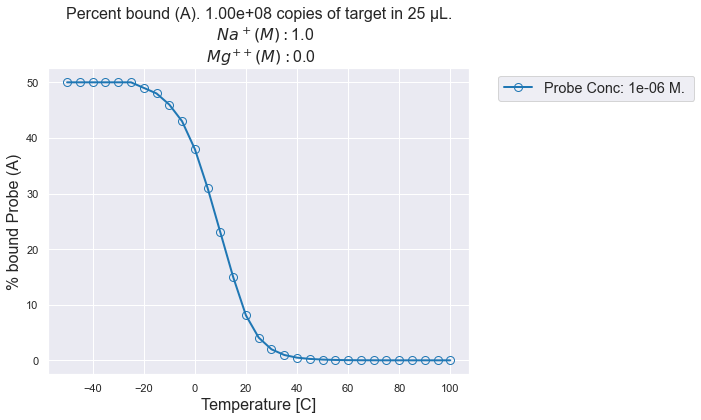

In [174]:
# Insert your sequence here!
strand_1 = 'TTTATCCGATGATGATGGCATCCCTTATTTA'
strand_2 = 'AAATAGGCTACTACTACCGTAGGGAATAAAT'

strands = [strand_1,strand_2]
nucleic_acid_type='DNA'

temp_start = -50
temp_stop = 100
temp_interval = 5
temperatureC = list(range(temp_start,temp_stop+1,temp_interval))

concentration_A = [1e-6]#, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16, 1e-17] # Capture probe
# concentration_B = [1e-9, 2e-9, 3e-9, 5e-9] # Target

# concentration_A = [4e-6,4e-4]

sampleVolume_uL = 25
targetAmount = 10e7

# Don't change! If you know the exact concentration(s), just feed them into "run_all"
concentration_B = [convert_copyNumber2Conc(sampleVolume_uL,targetAmount)] # Default: Target 1000 DNA/RNA's in 25μL

concentrations = [concentration_A, concentration_B]

Na_M = 1
Mg_M = 0

species = "A"
complexes = 2

# run_all() # Works with no inputs for default values.

Results, df_Nupack, temp_concBound, t_result, c_result = run_all(strands, 
                                             nucleic_acid_type, 
                                             temperatureC, 
                                             sampleVolume_uL,
                                             concentrations,
                                             Na_M, Mg_M,
                                             complexes,
                                             species,)#,"Save")


In [ ]:
df_Nupack

In [18]:
temp_concBound[0]

,TempC,Na_M,Mg_M,percent_bound_A,percent_bound_B,AB_Conc_M,A_Conc_M,B_Conc_M
0,-50.0,1.0,0.0,50.000,7.530120e+06,5.000000e-07,4.000000e-24,7.000000e-12
1,-45.0,1.0,0.0,50.000,7.530120e+06,5.000000e-07,4.000000e-23,7.000000e-12
2,-40.0,1.0,0.0,50.000,7.530120e+06,5.000000e-07,3.000000e-22,7.000000e-12
3,-35.0,1.0,0.0,50.000,7.530120e+06,5.000000e-07,3.000000e-21,7.000000e-12
4,-30.0,1.0,0.0,50.000,7.530120e+06,5.000000e-07,2.000000e-20,7.000000e-12
5,-25.0,1.0,0.0,50.000,7.530120e+06,5.000000e-07,2.000000e-19,7.000000e-12
6,-20.0,1.0,0.0,49.000,7.379518e+06,4.900000e-07,2.000000e-18,7.000000e-12
7,-15.0,1.0,0.0,48.000,7.228916e+06,4.800000e-07,2.000000e-17,7.000000e-12
8,-10.0,1.0,0.0,46.000,6.927711e+06,4.600000e-07,3.000000e-16,7.000000e-12
9,-5.0,1.0,0.0,43.000,6.475904e+06,4.300000e-07,3.000000e-15,7.000000e-12


### We can also check percent bound of target instead of percent bound probe

TTTATCCGATGATGATGGCATCCCTTATTTA
AAATAGGCTACTACTACCGTAGGGAATAAAT
5'-UUUAUCCGAUGAUGAUGGCAUCCCUUAUUUA-3'
3'-AAAUAGGCUACUACUACCGUAGGGAAUAAAU-5'
Number of tubes: 12
252 number of conditions
 Na+: 1M,  Mg++: 0M,


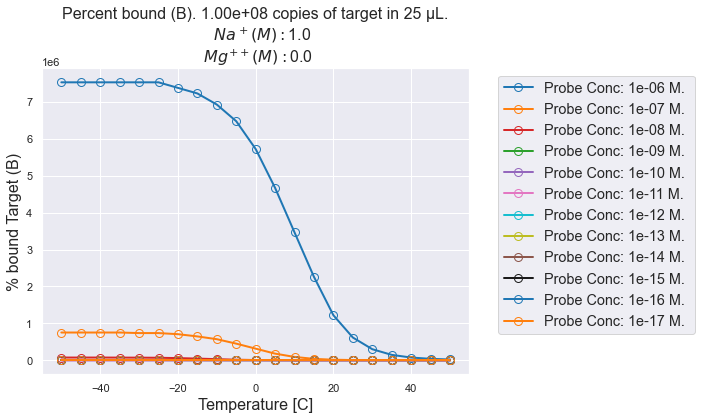

In [7]:
Results, df_Nupack, temp_concBound = run_all(fiveprime_strand, 
                                             nucleic_acid_type, 
                                             temperatureC, 
                                             sampleVolume_uL,
                                             concentration_A,
                                             concentration_B,
                                             Na_M, Mg_M,
                                             "B","noSave")

## Comments

## Running same experiments but with RNA instead of DNA

TTTATCCGATGATGATGGCATCCCTTATTTA
AAATAGGCTACTACTACCGTAGGGAATAAAT
5'-UUUAUCCGAUGAUGAUGGCAUCCCUUAUUUA-3'
3'-AAAUAGGCUACUACUACCGUAGGGAAUAAAU-5'
Number of tubes: 12
252 number of conditions
 Na+: 1M,  Mg++: 0M,


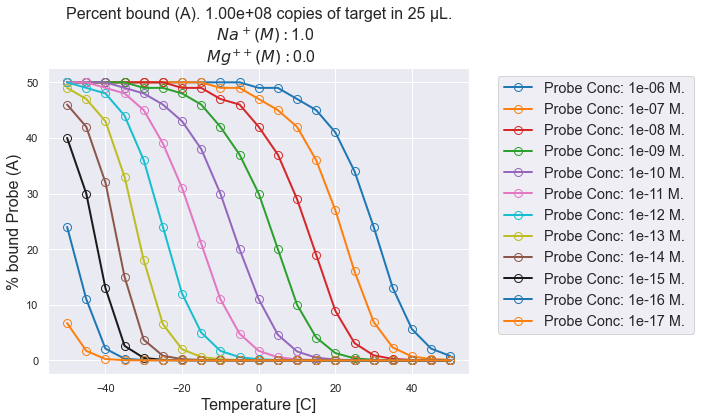

In [8]:
Results, df_Nupack, temp_concBound = run_all(fiveprime_strand, 
                                             'RNA', 
                                             temperatureC, 
                                             sampleVolume_uL,
                                             concentration_A,
                                             concentration_B,
                                             Na_M, Mg_M,
                                             "A","noSave")

## Checking percent bound of target instead of percent bound probe for RNA

TTTATCCGATGATGATGGCATCCCTTATTTA
AAATAGGCTACTACTACCGTAGGGAATAAAT
5'-UUUAUCCGAUGAUGAUGGCAUCCCUUAUUUA-3'
3'-AAAUAGGCUACUACUACCGUAGGGAAUAAAU-5'
Number of tubes: 12
252 number of conditions
 Na+: 1M,  Mg++: 0M,


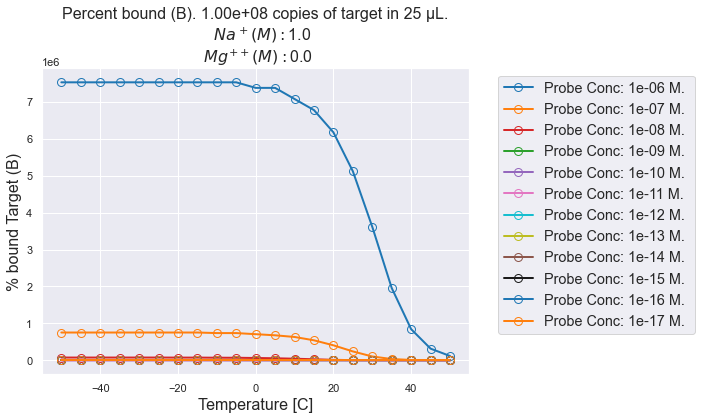

In [9]:
Results, df_Nupack, temp_concBound = run_all(fiveprime_strand, 
                                             'RNA', 
                                             temperatureC, 
                                             sampleVolume_uL,
                                             concentration_A,
                                             concentration_B,
                                             Na_M, Mg_M,
                                             "B","noSave")

### Use the following two code cells to scroll through your data
    Uncomment first!

In [ ]:
# pd.set_option("display.max_rows", None)
# df_Nupack.head(0)

In [ ]:
# df_Nupack